In [1]:
%reload_ext autoreload
%autoreload 2

import json
import os
from glob import glob
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm_notebook as tqdm
import sys
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_pickle('../data/total.pkl')
meta

,loan_finished,folder_name,date_of_birth,loan_date,loan_end_date,adress_index,adress_region,source,childs,education,...,gender,marital_status,total_taken,total_given,loan_etap_median,loan_etap_max,prolong,total_profit,total_profit_percent,age
0,1,39118-02-016_1c7ea7b8-30fd-11e5-81f6-f01fafe92f9d,1980-02-28,2018-01-11,2018-01-25,461034,Оренбургская обл,Звонок КС,3.0,Средне-специальное,...,Мужской,Гражданский брак,2000.0,2320.00,1.0,1.0,0.0,320.00,0.160000,37.0
1,1,04519-20010_dc1fb083-df28-11e7-80e7-000c293676f4,1962-09-08,2019-05-07,2019-05-21,446103,Самарская обл,Банер / Короб на офисе,0.0,среднее-техническое,...,Женский,Вдовец / Вдова,6000.0,12005.67,1.0,1.0,1.0,6005.67,1.000945,56.0
2,0,18-04-000018_9f0da275-01aa-11e8-80eb-000c293676f4,1977-11-03,2018-01-26,2018-02-09,461040,Оренбургская обл,Звонок с горячей линии,0.0,Среднее,...,Мужской,Гражданский брак,3000.0,0.00,NaN,NaN,0.0,-3000.00,-1.000000,40.0
3,1,19019-04-008_20534214-6d31-11e8-80f4-000c293676f4,1976-03-02,2019-01-22,2019-02-05,461363,Оренбургская обл,Наружная реклама,2.0,Средне-специальное,...,Мужской,Женат / Замужем,10000.0,12800.00,1.0,1.0,0.0,2800.00,0.280000,42.0
4,0,56318-19-021_25060137-84b6-11e7-80e6-000c293676f4,1977-05-12,2018-05-11,2018-05-25,446116,Самарская обл,Звонок КС,0.0,Среднее,...,Женский,Холост / Не замужем,10000.0,4200.00,NaN,NaN,1.0,-5800.00,-0.580000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35174,1,54918-20-015_3cb8df22-5c16-11e8-80f3-000c293676f4,1978-09-13,2018-05-20,2018-06-03,446305,Самарская обл,Банер / Короб на офисе,1.0,Среднее,...,Женский,Вдовец / Вдова,2000.0,2320.00,1.0,1.0,0.0,320.00,0.160000,39.0
35175,1,04618-47-014_13b332b6-45e4-11e8-80f1-000c293676f4,1946-01-01,2018-11-24,2018-12-08,446253,Самарская обл,Банер / Короб на офисе,0.0,среднее-техническое,...,Женский,Вдовец / Вдова,3500.0,4095.00,1.0,1.0,1.0,595.00,0.170000,72.0
35176,1,37018-47-006_65da8683-d9a8-11e8-80ff-000c293676f4,1960-11-28,2018-11-20,2018-12-04,460034,Оренбургская обл,Наружная реклама,0.0,среднее-техническое,...,Мужской,Женат / Замужем,4000.0,5360.00,1.0,1.0,1.0,1360.00,0.340000,57.0
35177,1,13818-09-011_b8f7cd5d-1d0d-11e8-80eb-000c293676f4,1978-02-03,2018-03-01,2018-03-08,460508,Оренбургская обл,Интернет,1.0,Среднее,...,Женский,Разведен / Разведена,3000.0,3000.00,1.0,1.0,0.0,0.00,0.000000,40.0


In [3]:
features = pd.read_csv('df.csv', index_col=0)
features

,left_eye,right_eye,XFrontal,YFrontal,folder_name,Асимметрия челюсти,Высота бровей,Наклон глаз,Полнота верхней губы,Полнота нижней губы,...,Верхнее веко,Асимметрия брови,Наклон бровей,Размер рта,Асимметрия наклона глаз,Асимметрия носа,Размер глаз,Оттопыренность ушей,Ширина челюсти,Уголки рта
0,"[286.1910705566406, 148.8461151123047]","[364.6317138671875, 148.5450897216797]",0.001674,0.010570,39118-02-016_1c7ea7b8-30fd-11e5-81f6-f01fafe92f9d,-4.400442,0.213341,-7.851208e+00,1.702258,7.231558,...,1.833201,-8.885945,8.045408,43.290442,7.851208,14.336641,5.694376,11.784860,0.947890,0.851128
1,"[275.80926513671875, 151.69271850585938]","[345.51220703125, 167.5911865234375]",0.072391,-0.034158,04519-20010_dc1fb083-df28-11e7-80e7-000c293676f4,-0.605205,0.269376,-4.509767e+00,1.410235,5.984039,...,0.895949,0.096260,2.258178,36.558061,-2.096333,2.598141,6.137502,5.937830,0.860793,-16.326854
2,"[361.373046875, 156.10182189941406]","[428.7164611816406, 165.7320098876953]",-0.010736,0.010532,18-04-000018_9f0da275-01aa-11e8-80eb-000c293676f4,3.881097,0.190472,-6.025575e+00,1.192460,6.420938,...,0.580137,0.953399,12.640578,33.951635,0.000000,-1.439100,5.546837,19.262813,0.862289,-3.179830
3,"[290.2704162597656, 275.7000732421875]","[350.7634582519531, 247.5924530029297]",0.141560,-0.134916,19019-04-008_20534214-6d31-11e8-80f4-000c293676f4,2.264701,0.157371,-4.598899e+00,1.339225,5.666241,...,0.825050,1.143808,2.648524,35.565107,-0.591500,-10.608085,5.206807,18.600346,0.925004,1.760799
4,"[282.8948059082031, 131.0572052001953]","[346.4902038574219, 124.73724365234375]",0.035282,-0.040287,56318-19-021_25060137-84b6-11e7-80e6-000c293676f4,1.460208,0.227496,3.070016e+00,1.446336,8.237517,...,0.850491,8.071231,9.122614,32.693283,3.070016,1.190272,5.178545,5.259403,0.904408,-19.859923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35084,"[243.90895080566406, 194.94854736328125]","[295.4618835449219, 190.0760498046875]",0.045841,-0.087807,54918-20-015_3cb8df22-5c16-11e8-80f3-000c293676f4,7.561900,0.224744,-1.030485e+01,1.409636,8.333333,...,1.344165,8.433052,9.387742,29.862630,-3.825446,21.608887,6.518023,18.242348,0.884564,10.732665
35085,"[176.02943420410156, 103.9981460571289]","[250.6358184814453, 113.22624969482422]",-0.025059,0.006428,04618-47-014_13b332b6-45e4-11e8-80f1-000c293676f4,1.940135,0.244992,0.000000e+00,1.142391,4.343058,...,0.805393,0.766980,8.107647,42.222368,0.000000,6.243639,5.269883,11.423910,1.043043,-4.267893
35086,"[773.0554809570312, 1967.373291015625]","[896.1922607421875, 1962.4453125]",-0.008316,-0.024387,37018-47-006_65da8683-d9a8-11e8-80ff-000c293676f4,-0.830237,0.229541,-1.231945e+01,1.117164,4.157654,...,0.761099,2.900870,10.141280,37.084780,-2.311605,-4.193323,5.931723,13.523564,0.782567,30.659240
35087,"[323.3465881347656, 124.1826400756836]","[401.6488037109375, 139.60952758789062]",-0.038503,-0.022917,13818-09-011_b8f7cd5d-1d0d-11e8-80eb-000c293676f4,1.289822,0.201189,1.421085e-14,1.958068,7.061893,...,1.031116,2.938852,11.811136,40.147345,0.000000,1.080070,4.908314,22.107223,0.937930,18.225075


In [4]:
df = pd.merge(left=meta, right=features, on='folder_name', how='inner')

In [5]:
job_dict = {'продавец-кассир':'продавец', 'пенсионерка':'пенсионер', 'уборщица':'уборщик', 
            'директор':'руководитель', 'продавец-консультант':'продавец', 'пенсионер по возрасту':'пенсионер',
            'санитарка':'санитар', 'помощник бурильщика':'бурильщик', 'помошник бурильщика':'бурильщик', 
            'кассир':'продавец', 'пекарь':'повар', 'дорожный рабочий':'разнорабочий', 
            'пенсионер по старости':'пенсионер', 'пенсионер по инвалидности':'пенсионер', 'продавец кассир':'продавец',
            'подсобный рабочий':'разнорабочий', 'сторож':'охранник', 'автомойщица':'автомойщик', 'кондуктор':'контролер', 
            'на пенсии':'пенсионер', 'водитель-экспедитор':'водитель', 'стропольщик':'стропальщик', 
            'электромонтажник':'электрик', 'слесарь-ремонтник':'слесарь', 
            'старший продавец':'продавец', 'продавец консультант':'продавец', 'штукатур-маляр':'строитель', 
            'уборщик служебных помещений':'уборщик', 'электросварщик':'электрик', 'упаковщица':'упаковщик', 
            'газоэлектросварщик':'электрик', 'кондитер':'повар', 'слесарь-сантехник':'слесарь', 'прораб':'строитель', 
            'электромантер':'электрик', 'слесарь мср':'слесарь', 'индивидуальный предприниматель':'ип', 
            'пфрф':'пф рф', 'электрогазосварщик':'электрик', 'техничка':'уборщик', 'рабочий':'разнорабочий', 
            'таксист':'водитель', 'электромонтер':'электрик', 'торговый представитель':'продавец', 
            'водитель погрузчика':'водитель', 'экспедитор':'водитель', 'охраник':'охранник',
            'домохозяйка':'-', 'предприниматель':'ип'}

df['job'] = df['job'].apply(lambda x: x.lower().strip())
# jobs_available = job_dict.values()
jobs_available = ['пенсионер', 'продавец', 'водитель', 'руководитель', 'разнорабочий', 'слесарь', 'уборщик', 'повар', 'монтажник', 'охранник', 'грузчик', 'бурильщик', '-', 'электрик', 'оператор', 'администратор', 'сварщик', 'строитель', 'санитар', 'мастер', 'менеджер', 'бухгалтер', 'охраник', 'стропальщик', 'кладовщик', 'автомойщик', 'воспитатель', 'дворник', 'диспетчер', 'контролер', 'ип', 'отделочник', 'автослесарь', 'инженер', 'медсестра', 'кухонный работник', 'менеджер по продажам', 'учитель', 'упаковщик', 'бригадир', 'пф рф', 'парикмахер', 'вязальщик', 'механизатор', 'маляр', 'бетонщик', 'машинист', 'официант', 'почтальон', 'бармен', 'другое']


df['job'] = df['job'].replace(job_dict).apply(lambda x: x.lower().strip())
df['job'] = df['job'].apply(lambda x: (x if x in jobs_available else 'другое'))
df['education'] = df['education'].replace({'':'-'}).apply(lambda x: x.lower().strip())
df['marital_status'] = df['marital_status'].replace({'':'-'}).apply(lambda x: x.lower().strip())
df['source'] = df['source'].apply(lambda x: x if x in ['Звонок КС', 'Интернет', 'Банер / Короб на офисе', 'Наружная реклама'] else 'Другое')

df['fraud'] = df['total_profit'] < 0
df['total_profit'] = df['total_profit'].apply(lambda x: 20000 if x > 20000 else x)
df['total_profit'] = df['total_profit'].apply(lambda x: -20000 if x < -20000 else x)

In [6]:
df2 = df.append(df)
df2 = df2.append(df2.sample(frac=0.1))
df2

,loan_finished,folder_name,date_of_birth,loan_date,loan_end_date,adress_index,adress_region,source,childs,education,...,Асимметрия брови,Наклон бровей,Размер рта,Асимметрия наклона глаз,Асимметрия носа,Размер глаз,Оттопыренность ушей,Ширина челюсти,Уголки рта,fraud
0,1,39118-02-016_1c7ea7b8-30fd-11e5-81f6-f01fafe92f9d,1980-02-28,2018-01-11,2018-01-25,461034,Оренбургская обл,Звонок КС,3.0,средне-специальное,...,-8.885945,8.045408,43.290442,7.851208,14.336641,5.694376,11.784860,0.947890,0.851128,False
1,1,04519-20010_dc1fb083-df28-11e7-80e7-000c293676f4,1962-09-08,2019-05-07,2019-05-21,446103,Самарская обл,Банер / Короб на офисе,0.0,среднее-техническое,...,0.096260,2.258178,36.558061,-2.096333,2.598141,6.137502,5.937830,0.860793,-16.326854,False
2,0,18-04-000018_9f0da275-01aa-11e8-80eb-000c293676f4,1977-11-03,2018-01-26,2018-02-09,461040,Оренбургская обл,Другое,0.0,среднее,...,0.953399,12.640578,33.951635,0.000000,-1.439100,5.546837,19.262813,0.862289,-3.179830,True
3,1,19019-04-008_20534214-6d31-11e8-80f4-000c293676f4,1976-03-02,2019-01-22,2019-02-05,461363,Оренбургская обл,Наружная реклама,2.0,средне-специальное,...,1.143808,2.648524,35.565107,-0.591500,-10.608085,5.206807,18.600346,0.925004,1.760799,False
4,0,56318-19-021_25060137-84b6-11e7-80e6-000c293676f4,1977-05-12,2018-05-11,2018-05-25,446116,Самарская обл,Звонок КС,0.0,среднее,...,8.071231,9.122614,32.693283,3.070016,1.190272,5.178545,5.259403,0.904408,-19.859923,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1,19619-13-005_5a2e4093-5081-11e9-9979-00155d2d0507,1976-04-17,2019-03-27,2019-04-10,460000,Оренбургская обл,Другое,1.0,высшее,...,1.284410,10.918532,37.727640,-0.189720,-2.125967,5.737153,7.659744,0.960527,-15.881677,False
4442,1,10919-08-001_7f4f34c2-0419-11e9-8105-000c293676f4,1966-09-24,2019-02-18,2019-03-04,461042,Оренбургская обл,Звонок КС,2.0,незаконченное высшее,...,0.482682,1.055341,41.871712,3.119517,-6.028887,5.609384,17.719359,1.063539,-13.596482,False
13360,1,56318-47-013_5554a5eb-d759-11e3-b5db-d4ae52c6cb41,1995-11-21,2018-11-21,2018-12-05,446116,Самарская обл,Звонок КС,0.0,среднее,...,-16.512014,14.072658,36.408808,14.134605,41.592384,5.335604,7.828928,0.907924,5.704628,False
17545,1,37018-24-011_f444990a-2fbb-11e7-80e3-000c293676f4,1959-01-26,2018-06-17,2018-07-01,460009,Оренбургская обл,Наружная реклама,0.0,высшее,...,3.555537,8.368896,35.007282,3.576334,-4.128481,5.548752,4.999000,0.929814,-3.012788,False


<AxesSubplot:xlabel='total_profit', ylabel='Count'>

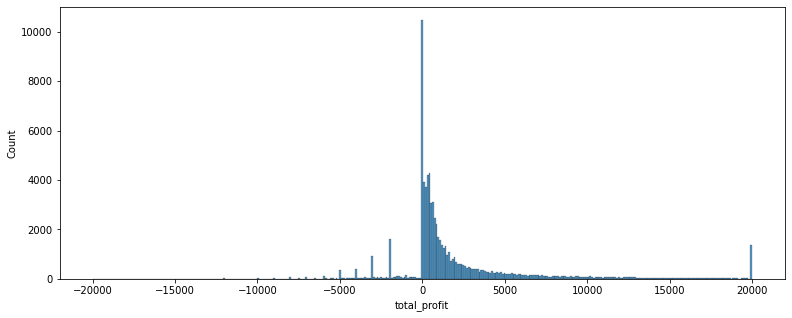

In [7]:
plt.figure(figsize=(13,5))
sns.histplot(df2, x='total_profit')

<AxesSubplot:xlabel='age', ylabel='Count'>

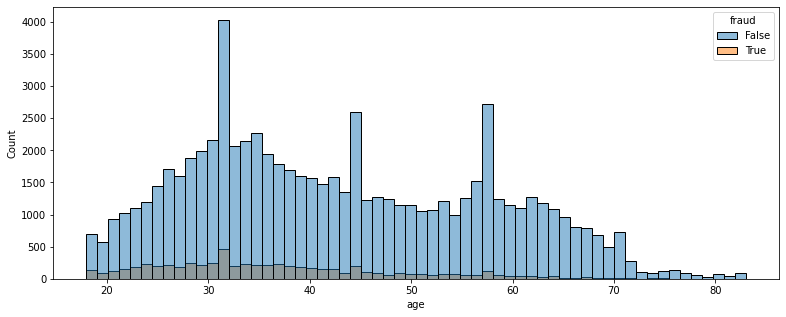

In [8]:
plt.figure(figsize=(13,5))
sns.histplot(df2, x='age', bins=60, hue='fraud')

<AxesSubplot:xlabel='childs', ylabel='Count'>

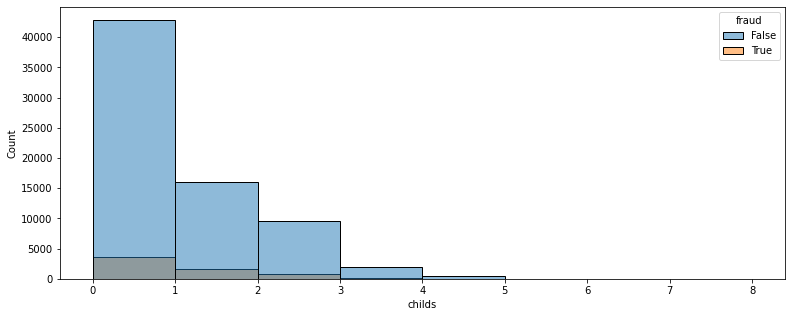

In [18]:
plt.figure(figsize=(13,5))
sns.histplot(df2, x='childs', bins=8, hue='fraud')

<AxesSubplot:xlabel='source', ylabel='Count'>

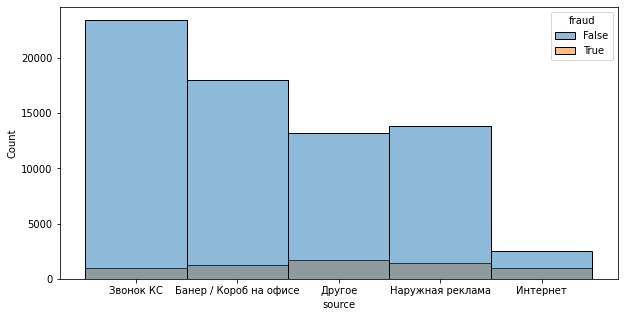

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df2, x='source', bins=6, hue='fraud')

<AxesSubplot:xlabel='gender', ylabel='Count'>

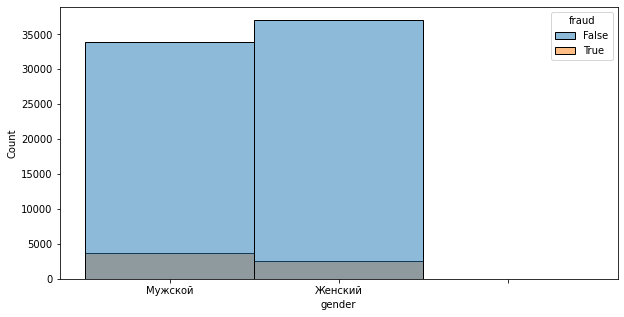

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df2, x='gender', bins=6, hue='fraud')

<AxesSubplot:xlabel='marital_status', ylabel='Count'>

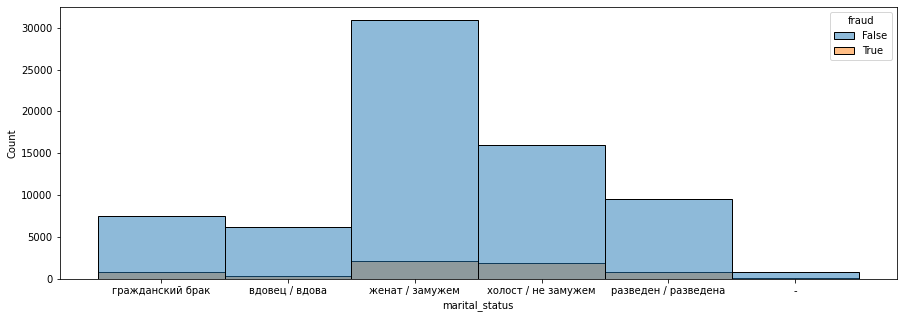

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(df2, x='marital_status', bins=6, hue='fraud')

<AxesSubplot:xlabel='education', ylabel='Count'>

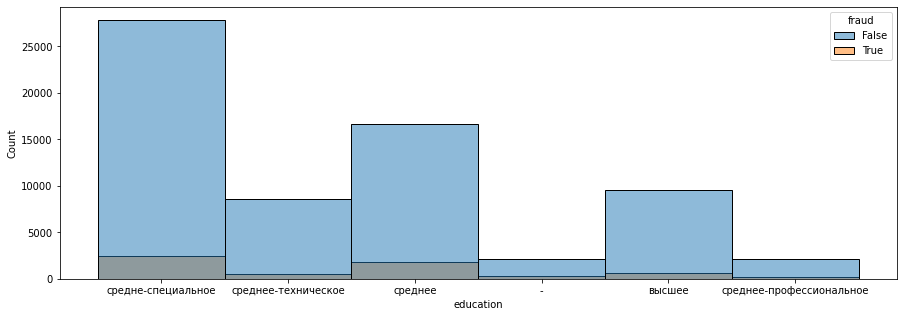

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(df2[df2['education'].isin(df2['education'].value_counts()[:6].index)], x='education', bins=6, hue='fraud')

In [13]:
df2.to_csv('df2_total.csv')
df.to_csv('df_total.csv')
